### Candidate number: 1030
***
## Exercise 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [91]:
# Stock data class for storing stock data
class StockData:
    def __init__(self, tickers, start, end, names, period='11Y'):
        self.tickers = tickers
        self.names = {self.tickers[i]: names[i] for i in range(len(tickers))}
        self.df = yf.download(self.tickers, period=period, ignore_tz=True, progress=False)
        self.close = pd.DataFrame(self.df['Adj Close']).loc['2013-01-01':'2023-05-31']
        self.returns = np.log(self.close/self.close.shift()).dropna()

# Ticker symbols:
tickers = ['AAPL', 'MSFT', 'BP', 'JNJ', 'NVS', 'KO', 'UL', 'JPM', 'BCS', 'SONY', '^GSPC']
# Stock names:
stock_names = ['Apple', 'Microsoft', 'BP plc', 'Johnson & Johnson', 'Novartis AG', 'The Coca Cola Company ', 'Unilever Plc', 'JP Morgan Chase & Co', 'Barclays Plc', 'Sony', 'S&P 500']
# Stock data:
data = StockData(tickers, '2013-01-01', '2023-05-31', names=stock_names)


#### a.)
I assume that the 30-days holding period returns could be calculating over each month, and the 252 days over each year

In [92]:
# 1-day holding period returns
returns_1d = data.returns
# 1-month holding period returns
returns_30d = data.returns.resample('1M').sum()
# 1-year holding period returns
returns_252d = data.returns.resample('1Y').sum()

display(returns_252d)

,AAPL,BCS,BP,JNJ,JPM,KO,MSFT,NVS,SONY,UL,^GSPC
Date,,,,,,,,,,,
2013-12-31,0.046415,0.112920,0.186271,0.286817,0.290446,0.122428,0.333208,0.267843,0.406912,0.088432,0.234206
2014-12-31,0.340909,-0.162857,-0.193157,0.159883,0.094244,0.051321,0.243453,0.175313,0.168832,0.019020,0.107873
2015-12-31,-0.030601,-0.121308,-0.136924,0.011357,0.080405,0.050121,0.204506,-0.046230,0.184193,0.092589,-0.007293
2016-12-31,0.117609,-0.137267,0.254233,0.142620,0.296664,-0.003577,0.140438,-0.128324,0.130123,-0.026278,0.091074
2017-12-31,0.395174,0.004662,0.183025,0.218535,0.237116,0.134374,0.341677,0.177835,0.472275,0.337829,0.177476
2018-12-31,-0.055409,-0.345981,-0.046777,-0.052678,-0.068534,0.065539,0.188928,0.057753,0.071467,-0.023635,-0.064403
2019-12-31,0.636354,0.277313,0.056669,0.150315,0.387009,0.187304,0.454624,0.240071,0.342490,0.121123,0.253697
2020-12-31,0.600520,-0.137446,-0.532901,0.102770,-0.056938,0.024391,0.354411,0.032896,0.396602,0.086537,0.150650
2021-12-31,0.297495,0.275361,0.310280,0.108299,0.244872,0.107710,0.421843,-0.037220,0.223341,-0.079106,0.238172


#### b.)

In [93]:

results = [returns_1d, returns_30d, returns_252d]

mean_results = pd.DataFrame(columns=tickers)
for i, returns in enumerate(results):
    mean_results.loc[i] = returns.mean()

print('Mean:')
display(mean_results.rename({0:'1-day', 1:'30-day', 2:'252-day'}).T.rename(data.names).sort_values(by=['252-day'], ascending=False))

std_results = pd.DataFrame(columns=tickers)
for i, returns in enumerate(results):
    std_results.loc[i] = returns.std()

print('Standard deviation:')
display(std_results.rename({0:'1-day', 1:'30-day', 2:'252-day'}).T.rename(data.names))


Mean:


,1-day,30-day,252-day
Microsoft,0.001020,0.021386,0.243022
Apple,0.000899,0.018843,0.214123
Sony,0.000800,0.016775,0.190626
JP Morgan Chase & Co,0.000533,0.011178,0.127023
Johnson & Johnson,0.000409,0.008562,0.097298
S&P 500,0.000401,0.008401,0.095471
Novartis AG,0.000351,0.007353,0.083559
The Coca Cola Company,0.000299,0.006272,0.071271
Unilever Plc,0.000228,0.004780,0.054316
BP plc,0.000145,0.003045,0.034604


Standard deviation:


,1-day,30-day,252-day
Apple,0.018194,0.081082,0.288854
Microsoft,0.017090,0.060286,0.213253
BP plc,0.019373,0.073451,0.257047
Johnson & Johnson,0.011124,0.044570,0.116759
Novartis AG,0.011611,0.050343,0.124776
The Coca Cola Company,0.011335,0.046631,0.068746
Unilever Plc,0.013298,0.049175,0.113581
JP Morgan Chase & Co,0.016854,0.068576,0.174107
Barclays Plc,0.023365,0.103798,0.200905
Sony,0.019617,0.090263,0.263670


The stocks with the highest mean return in the 252-days window was Microsoft, Apple and Sony.

#### c.)

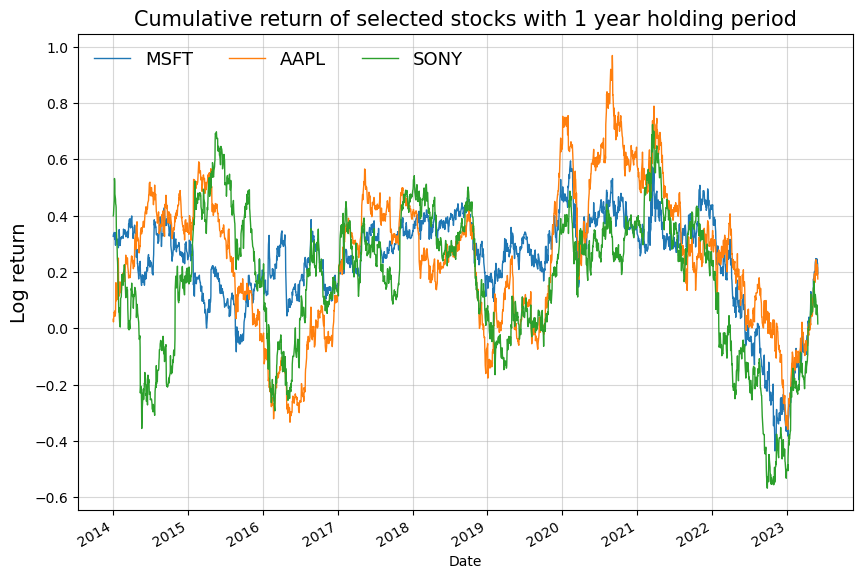

In [94]:
window=252
selected = ['MSFT', 'AAPL', 'SONY']

fig, ax = plt.subplots(1, figsize=(10, 7))

data.returns[selected].rolling(window).sum().plot(ax=ax, label='Optimal portfolio', linewidth=1)
ax.legend(frameon=False, fontsize=13, loc='upper left', ncol=3)
ax.grid(alpha=0.5)
ax.set_ylabel('Log return', fontsize=14)
ax.set_title('Cumulative return of selected stocks with 1 year holding period', fontsize=15);

Since all three companies are tech companies, their cumulative stock returns does not vary much, however, the Microsoft graph does seem to have lower volatility.

#### d.)

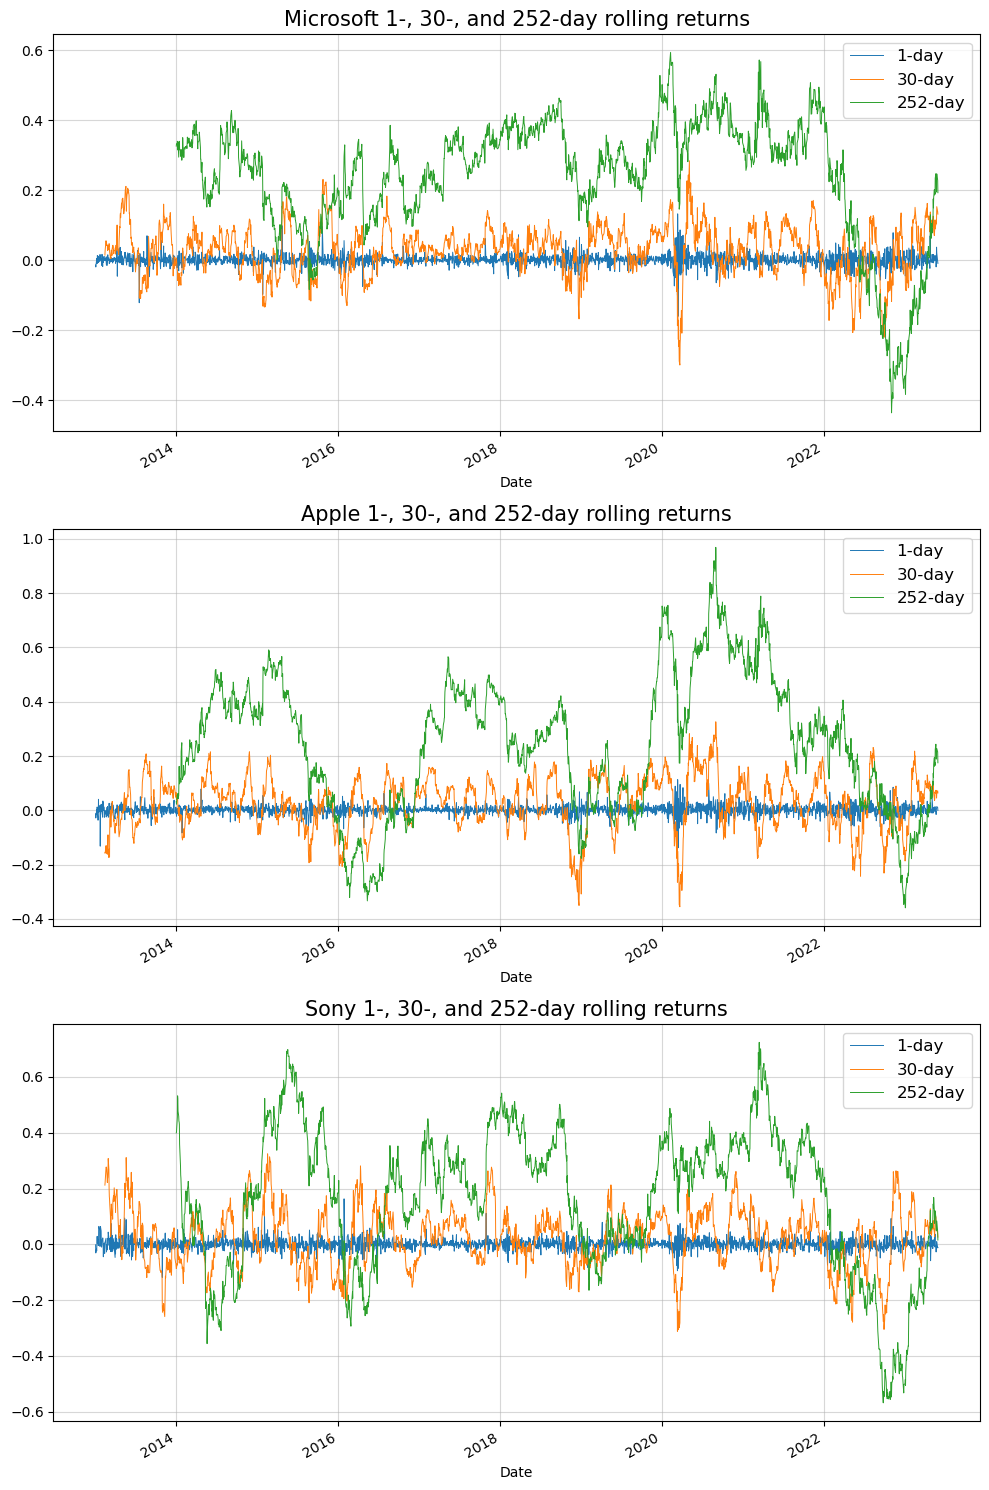

In [104]:
fig, axs = plt.subplots(3, figsize=(10, 15))

windows = [1, 30, 252]

for i, ticker in enumerate(selected):
    for j, window in enumerate(windows):
        data.returns[ticker].rolling(windows[j]).sum().plot(ax=axs[i], label=f'{window}-day' ,linewidth=0.7)
    
    axs[i].set_title(f'{data.names[ticker]} 1-, 30-, and 252-day rolling returns', fontsize=15)
    axs[i].legend(fontsize=12)
    axs[i].grid(alpha=0.5)

ax.legend(frameon=False, fontsize=13, loc='upper left', ncol=3)
ax.grid(alpha=0.5)
ax.set_ylabel('Log return', fontsize=14)
ax.set_title('Cumulative return of selected stocks with 1 year holding period', fontsize=15)
fig.tight_layout();

The plots tells us that more days of data gives a better overall depiction of the performence of the stocks.

#### e.)

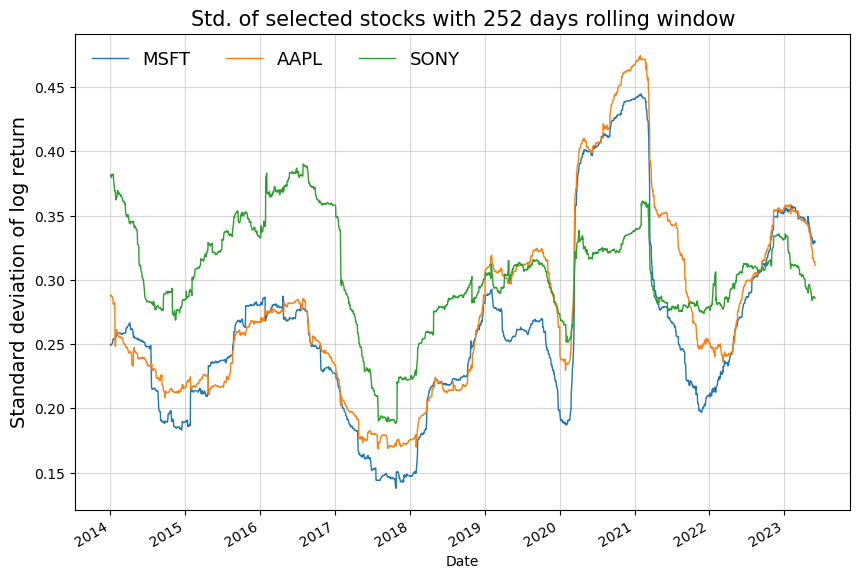

In [95]:

fig, ax = plt.subplots(1, figsize=(10, 7))

# Calculating of rolling standard deviation
rolling_std = data.returns[selected].rolling(window).std().multiply(np.sqrt(252))
rolling_std.plot(ax=ax, label='Optimal portfolio', linewidth=1)

ax.legend(frameon=False, fontsize=13, loc='upper left', ncol=3)
ax.grid(alpha=0.5)
ax.set_ylabel('Standard deviation of log return', fontsize=14)
ax.set_title('Std. of selected stocks with 252 days rolling window', fontsize=15);


By inspection of the plot, we see that the volatility of Microsoft and Apple is usually close and has usually been lower than Sony, exept during the first year of covid-19, where Sony did have a considerably lower standard deviation. It could be assumed that Sony kept a comparably low standard deviation through covid-19 because of Sony's large exposure towards the gaming sector which grew massively during the covid pandemic. All three stocks have had a fairly similar standard deviation in the last year.

#### f.)
The beta is calculated by using the S&P 500 index as the market, by the following equation:

$$

\beta=\rho_{S,M}\cdot \frac{\sigma_S}{\sigma_M}

$$

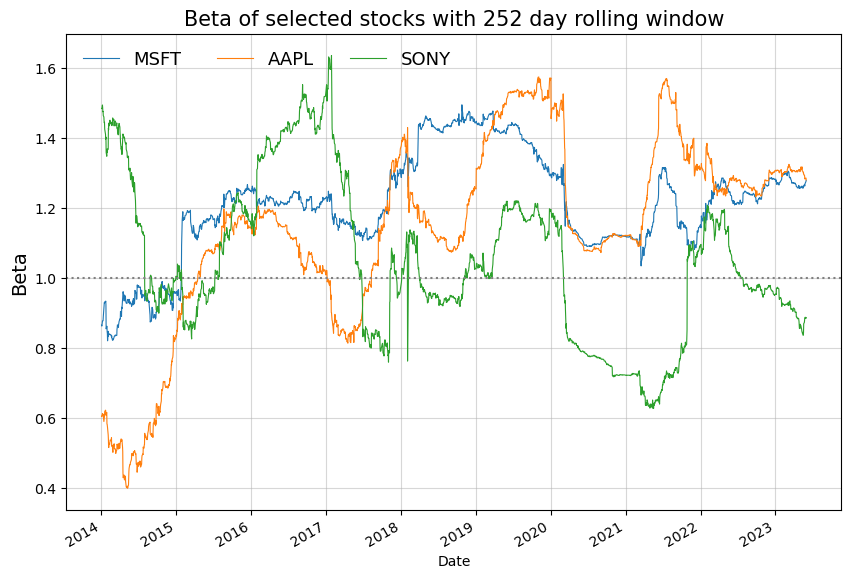

In [66]:
# Rolling correlation between selected stocks and s&p500
rolling_cor = data.returns[selected].rolling(window).corr(data.returns['^GSPC'])

# Rolling standard deviation of selected stocks
rolling_std = data.returns[selected].rolling(window).std().multiply(np.sqrt(252))

# Rolling standard deviation of s&p500
rolling_std_gspc = data.returns['^GSPC'].rolling(window).std().multiply(np.sqrt(252))

# Calculation of rolling beta
rolling_beta = (rolling_cor.mul(rolling_std)).div(rolling_std_gspc, axis=0)

# Plotting of rolling beta
rolling_beta.plot(ax=ax, linewidth=0.8)
fig, ax = plt.subplots(1, figsize=(10, 7))
ax.set_ylabel('Beta', fontsize=14)
ax.legend(frameon=False, fontsize=13, loc='upper left', ncol=3)
ax.grid(alpha=0.5)
ax.axhline(y=1, linestyle=':', color='gray')
ax.set_title(f'Beta of selected stocks with {window} day rolling window', fontsize=15);

#### Discussion

The beta of a stock is a measure of its systematic risk or sensitivity to the overall market movements. It quantifies the relationship between the stock's returns and the returns of a benchmark index, typically the market index, such as the S&P 500 used in the above calculations.

If the beta is greater than 1, it suggests that the stock is more volatile and tends to have larger price movements than the market as a whole. If the beta is less than 1, it indicates that the stock tends to be less volatile than the market

Microsoft have had the most stable beta during the analyzed time period, while Apples beta has increased a lot during 2014-2016. Sony's beta had a significant drop during the covid-19 pandemic. 

The large drop in Sony's beta could be explained the same way as the drop i standard deviation in e.). Microsoft and Apple also had a drop in beta under this period, indicating that volatility in the market was especially high during the pandemic.

Everything taken into consideration, Microsoft would be the best stock option pick when evaluating the stock history based on a stable return, standard deviation and beta.